In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Read Data

In [3]:
train = pd.read_csv(r'C:\Users\sures\Documents\Python Training\Black_Friday\train.csv')
test = pd.read_csv(r'C:\Users\sures\Documents\Python Training\Black_Friday\test.csv')

In [4]:
train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [5]:
train.shape

(550068, 12)

In [6]:
test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [7]:
test.shape

(233599, 11)

### Dataset attributes

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
train.describe(include = 'all').T

count unique        top    freq  \
User_ID                     550068.0    NaN        NaN     NaN   
Product_ID                    550068   3631  P00265242    1880   
Gender                        550068      2          M  414259   
Age                           550068      7      26-35  219587   
Occupation                  550068.0    NaN        NaN     NaN   
City_Category                 550068      3          B  231173   
Stay_In_Current_City_Years    550068      5          1  193821   
Marital_Status              550068.0    NaN        NaN     NaN   
Product_Category_1          550068.0    NaN        NaN     NaN   
Product_Category_2          376430.0    NaN        NaN     NaN   
Product_Category_3          166821.0    NaN        NaN     NaN   
Purchase                    550068.0    NaN        NaN     NaN   

                                      mean          std        min        25%  \
User_ID                     1003028.842401  1727.591586  1000001.0  1001516.0   
Product_ID                             NaN          NaN        NaN        NaN   
Gender                                 NaN          NaN        NaN        NaN   
Age                                    NaN          NaN        NaN        NaN   
Occupation                        8.076707      6.52266        0.0        2.0   
City_Category                          NaN          NaN        NaN        NaN   
Stay_In_Current_City_Years             NaN          NaN        NaN        NaN   
Marital_Status                    0.409653      0.49177        0.0        0.0   
Product_Category_1                 5.40427     3.936211        1.0        1.0   
Product_Category_2                9.842329      5.08659        2.0        5.0   
Product_Category_3               12.668243     4.125338        3.0        9.0   
Purchase                       9263.968713  5023.065394       12.0     5823.0   

                                  50%        75%        max  
User_ID                     1003077.0  1004478.0  1006040.0  
Product_ID                        NaN        NaN        NaN  
Gender                            NaN        NaN        NaN  
Age                               NaN        NaN        NaN  
Occupation                        7.0       14.0       20.0  
City_Category                     NaN        NaN        NaN  
Stay_In_Current_City_Years        NaN        NaN        NaN  
Marital_Status                    0.0        1.0        1.0  
Product_Category_1                5.0        8.0       20.0  
Product_Category_2                9.0       15.0       18.0  
Product_Category_3               14.0       16.0       18.0  
Purchase                       8047.0    12054.0    23961.0

### Find % of Missing data

In [11]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

missing_values  percent_missing
User_ID                                  0         0.000000
Product_ID                               0         0.000000
Gender                                   0         0.000000
Age                                      0         0.000000
Occupation                               0         0.000000
City_Category                            0         0.000000
Stay_In_Current_City_Years               0         0.000000
Marital_Status                           0         0.000000
Product_Category_1                       0         0.000000
Product_Category_2                  173638        31.566643
Product_Category_3                  383247        69.672659
Purchase                                 0         0.000000

### Unique values for each column

In [12]:
train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## EDA & Data Visualization

#### Understanding the correlation

<AxesSubplot:>

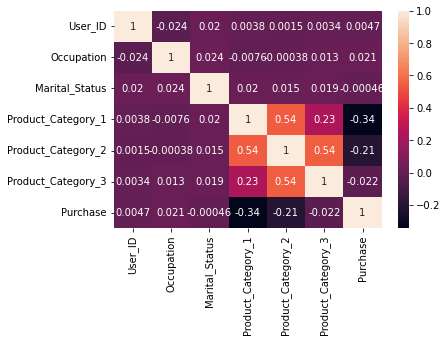

In [13]:
sns.heatmap(train.corr(),annot=True)

#### Finding out the distribution of Target variable

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

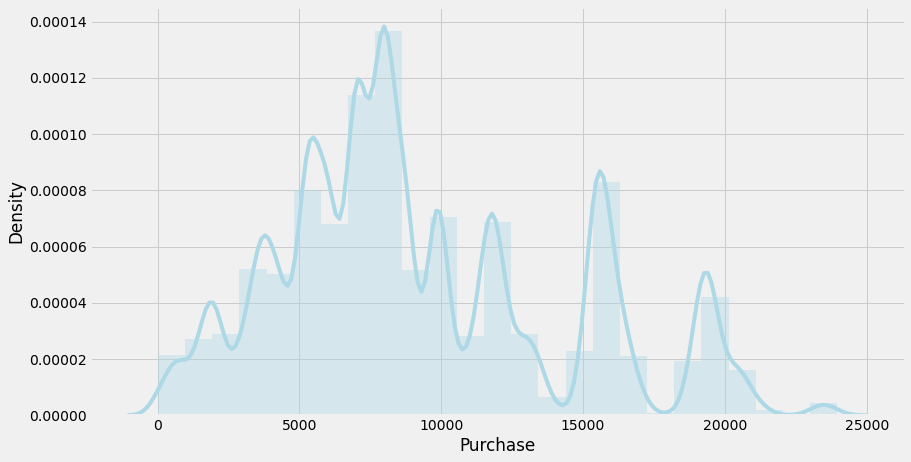

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(train['Purchase'], bins=25 , color ='lightblue')

#### Distribution of Quantitative data

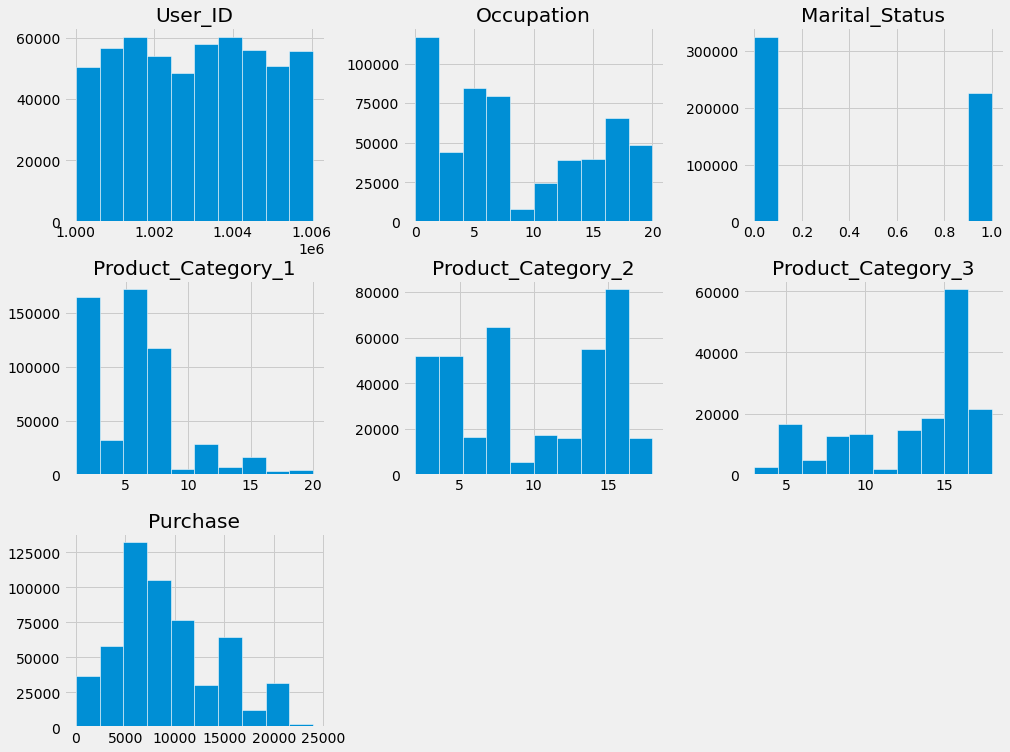

In [15]:
train.hist(edgecolor='white',figsize=(15,12));

#### Age and purchase trend of each product category

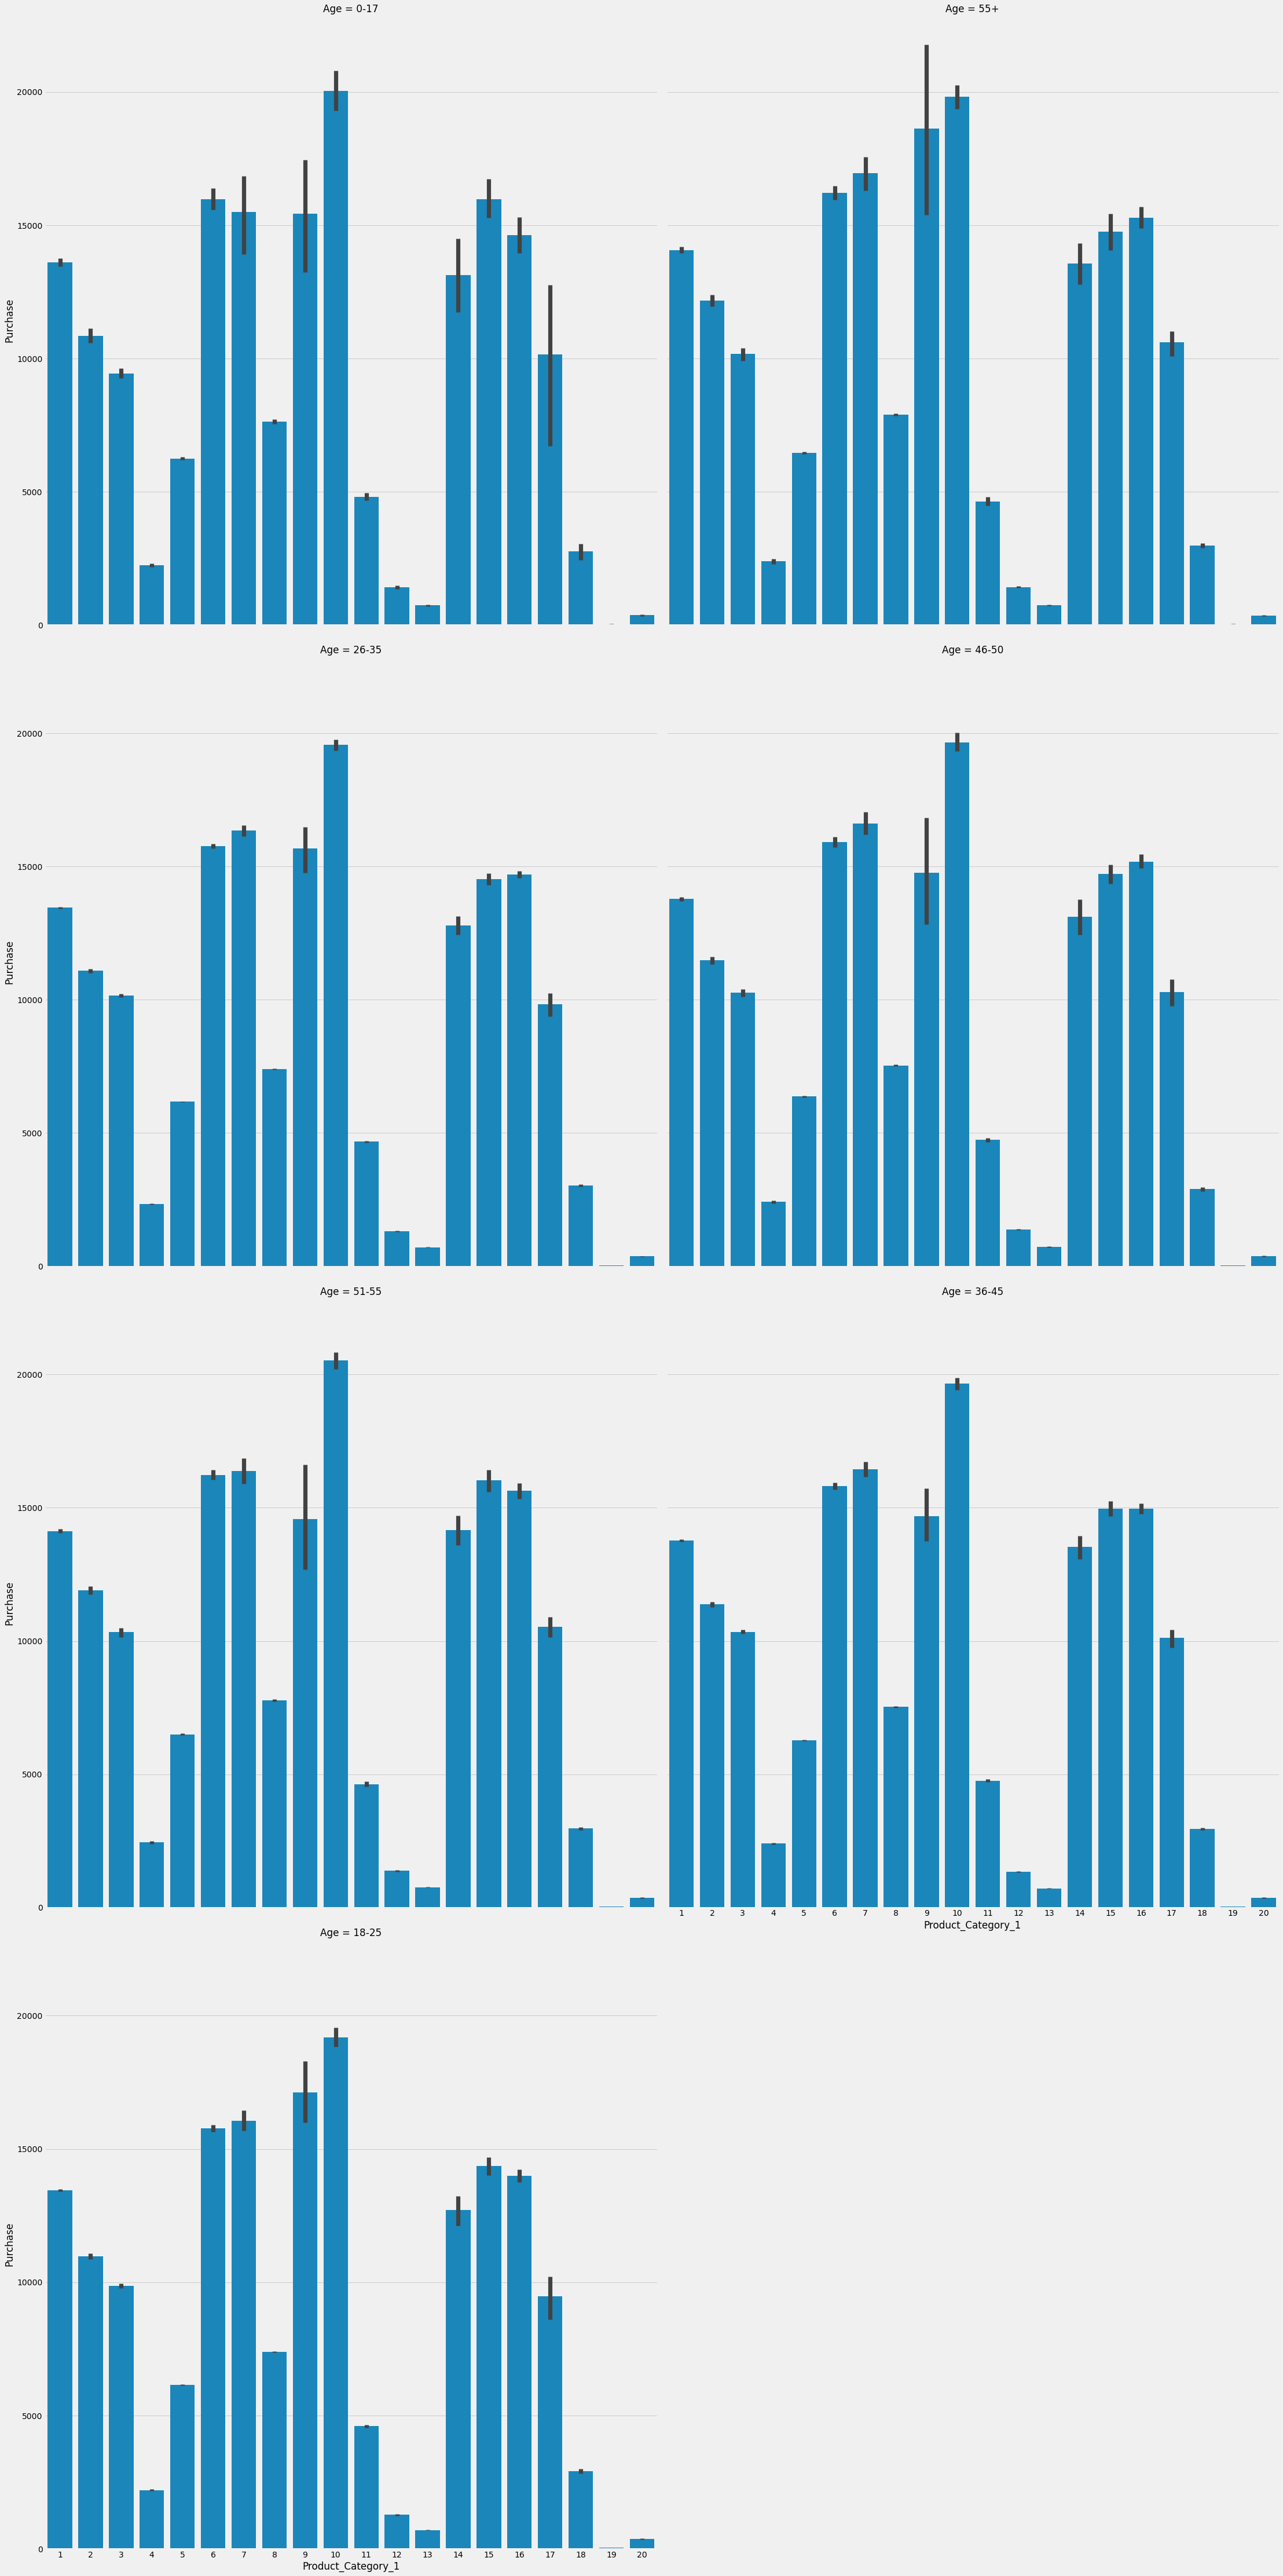

In [16]:
g = sns.FacetGrid(train,col="Age", height=15.5, aspect=1, col_wrap=2 )
g.map(sns.barplot, "Product_Category_1", "Purchase")
g.tight_layout()

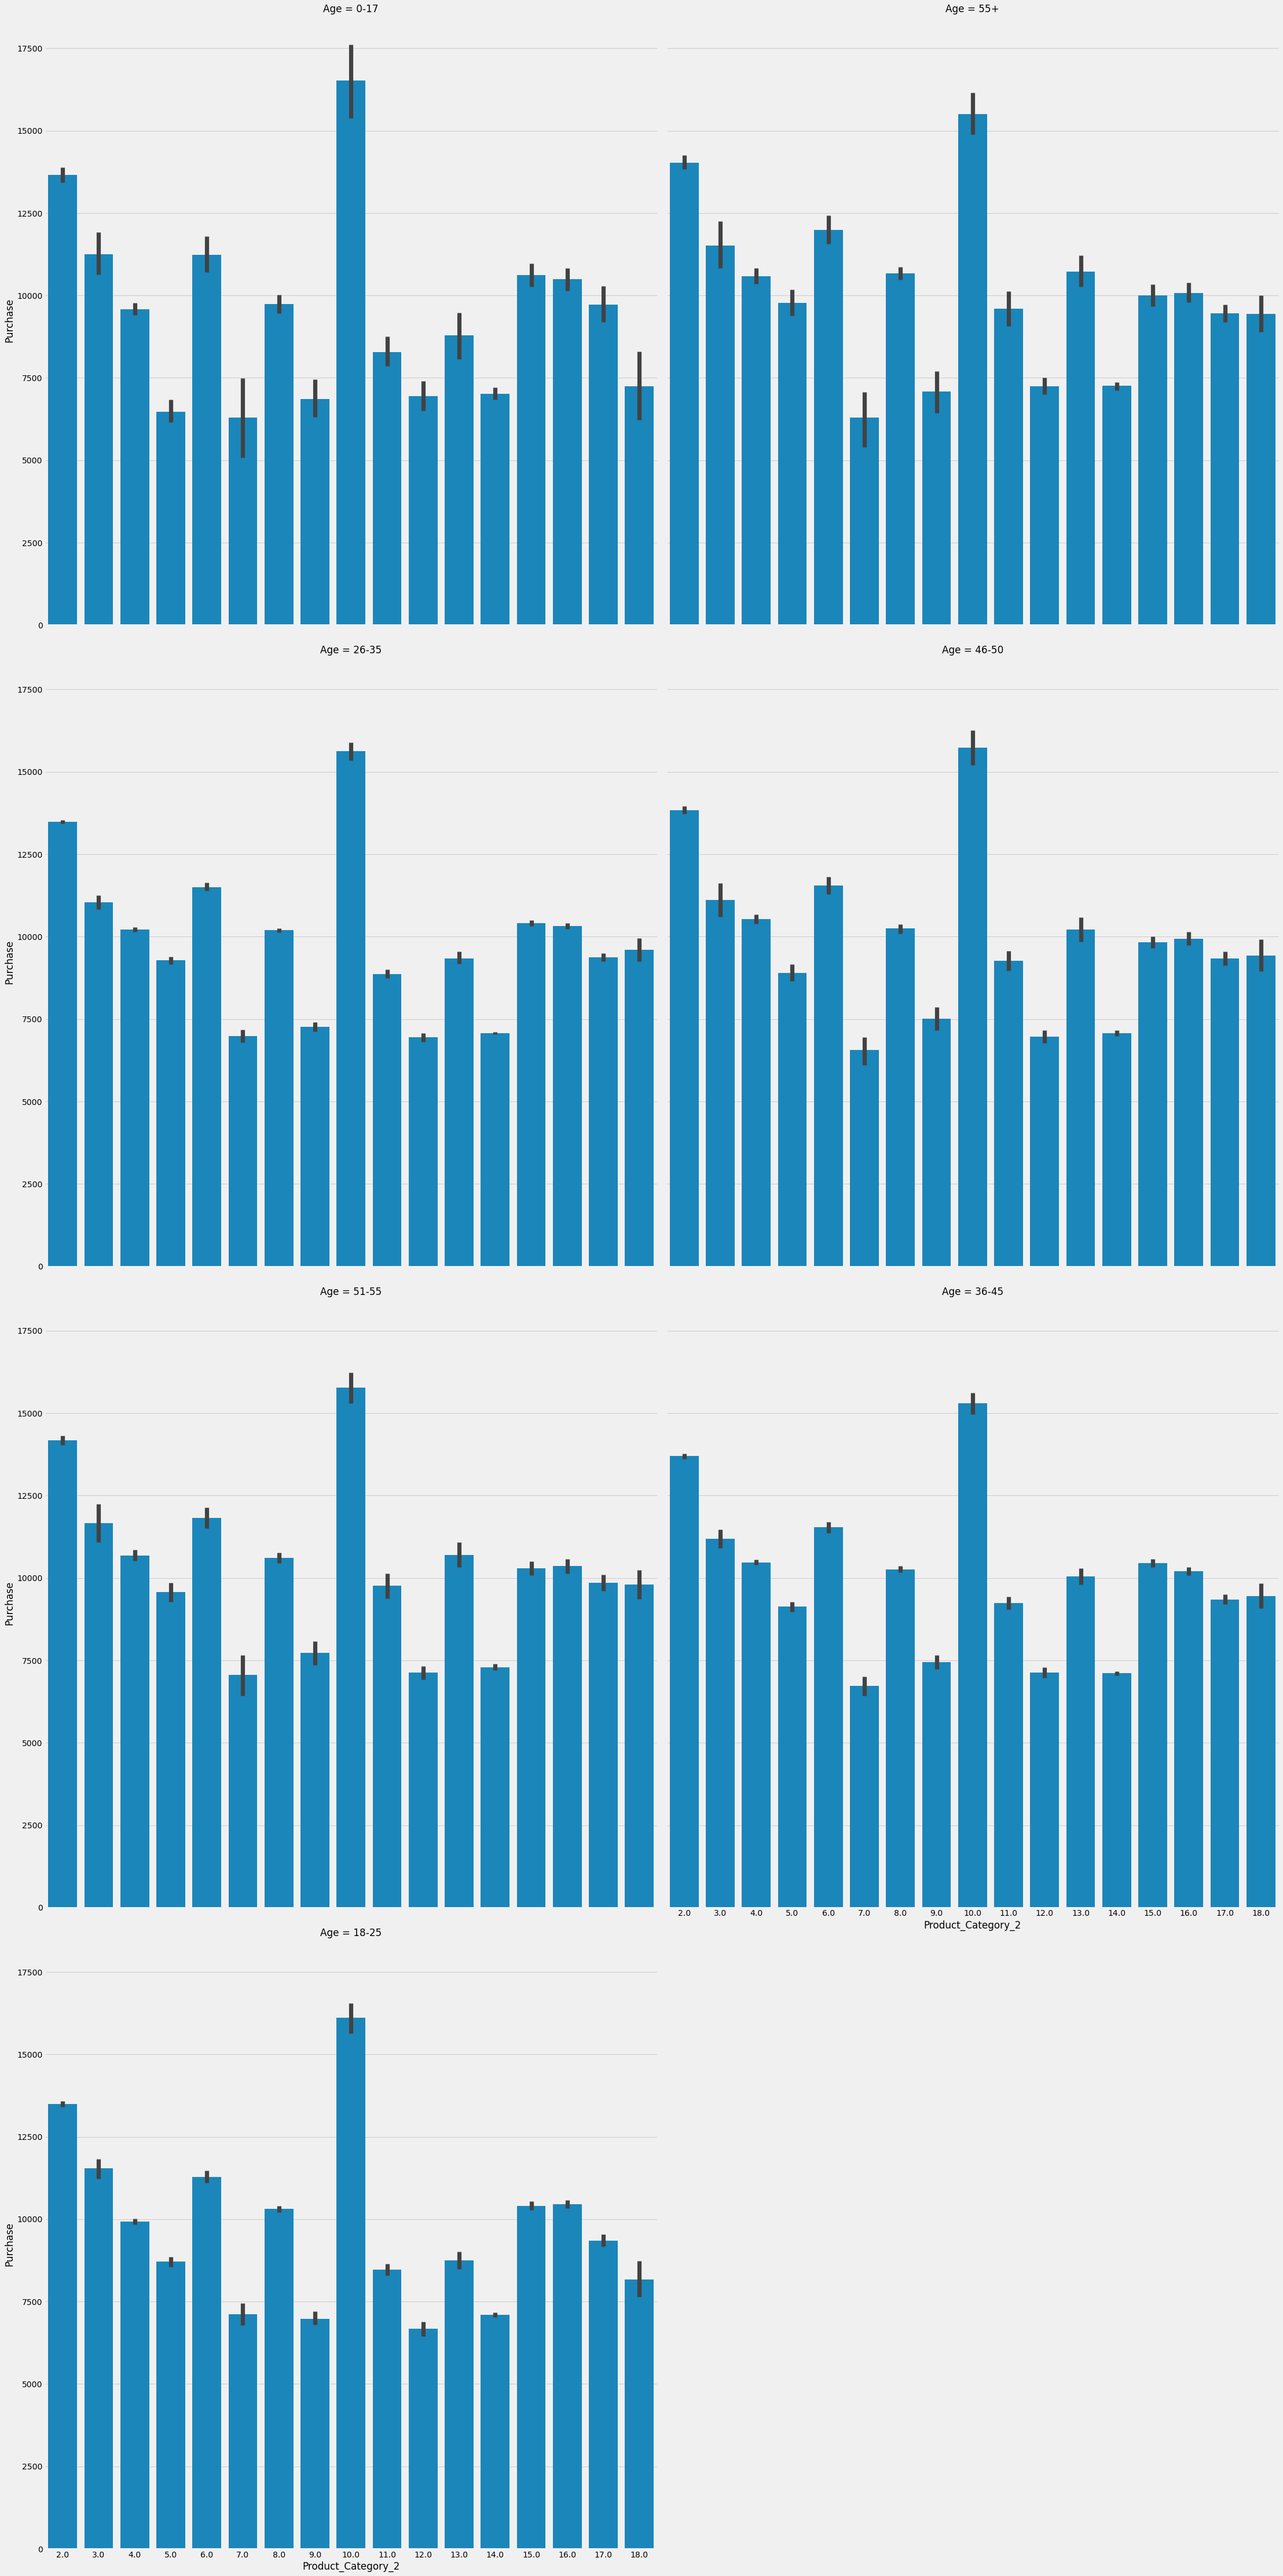

In [17]:
g = sns.FacetGrid(train,col="Age", height=15.5, aspect=1, col_wrap=2 )
g.map(sns.barplot, "Product_Category_2", "Purchase")
g.tight_layout()

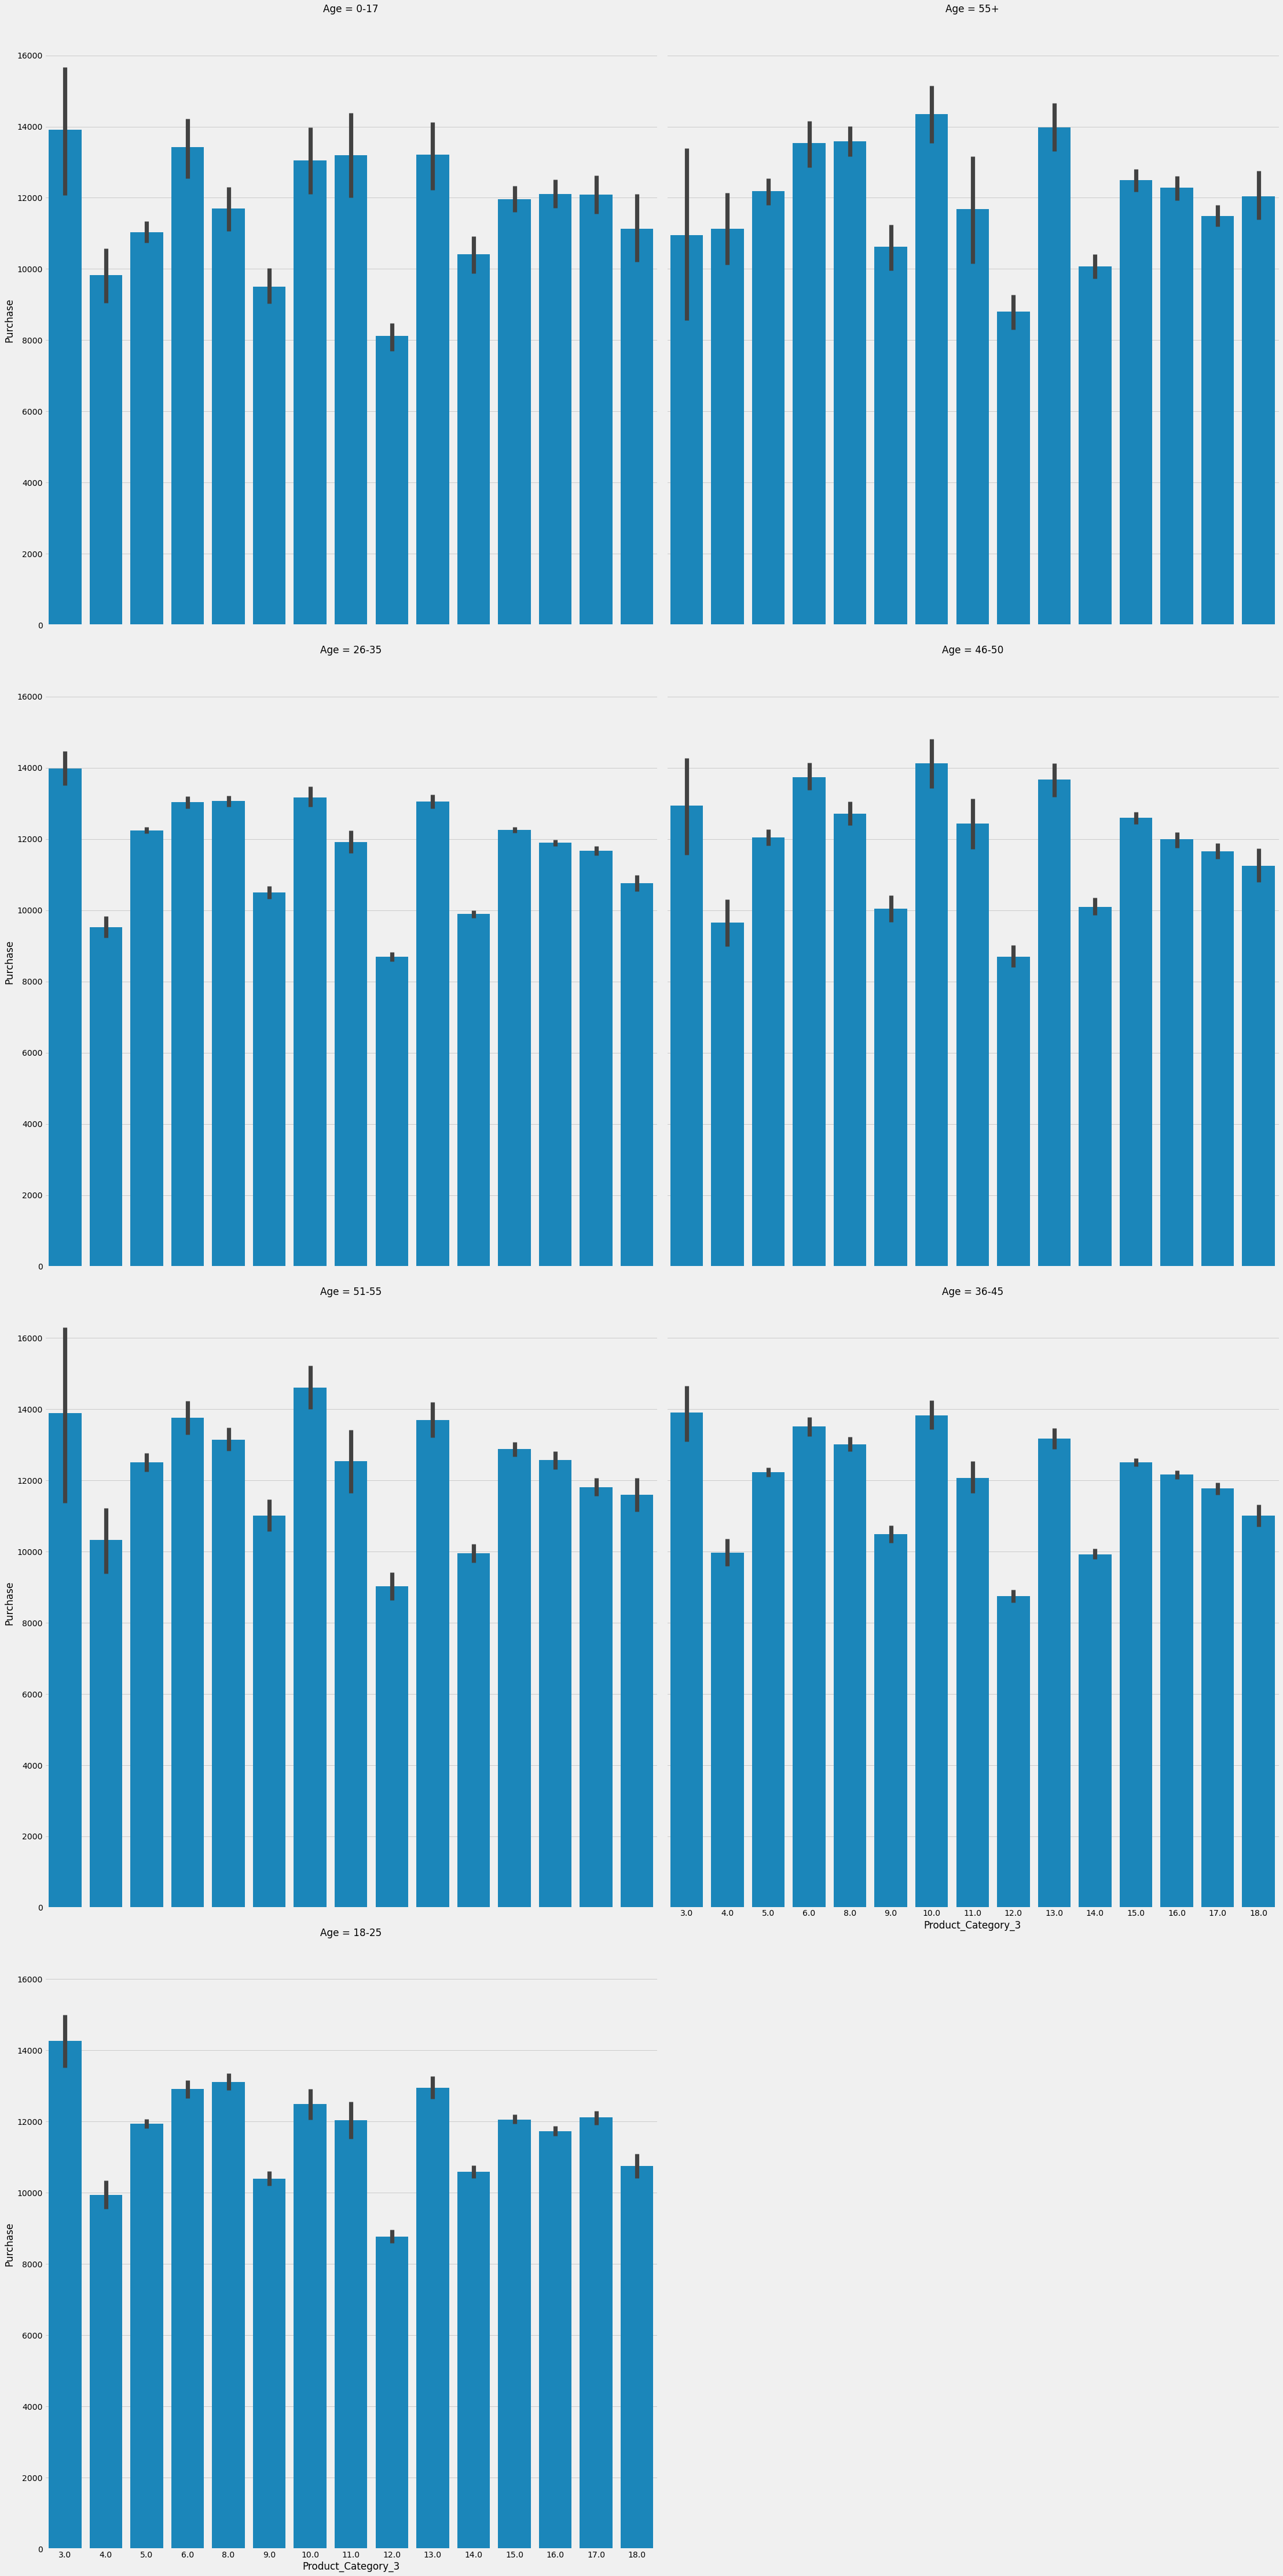

In [18]:
g = sns.FacetGrid(train,col="Age", height=15.5, aspect=1, col_wrap=2 )
g.map(sns.barplot, "Product_Category_3", "Purchase")
g.tight_layout()

#### Occupation and Genderwise Purchase analysis

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

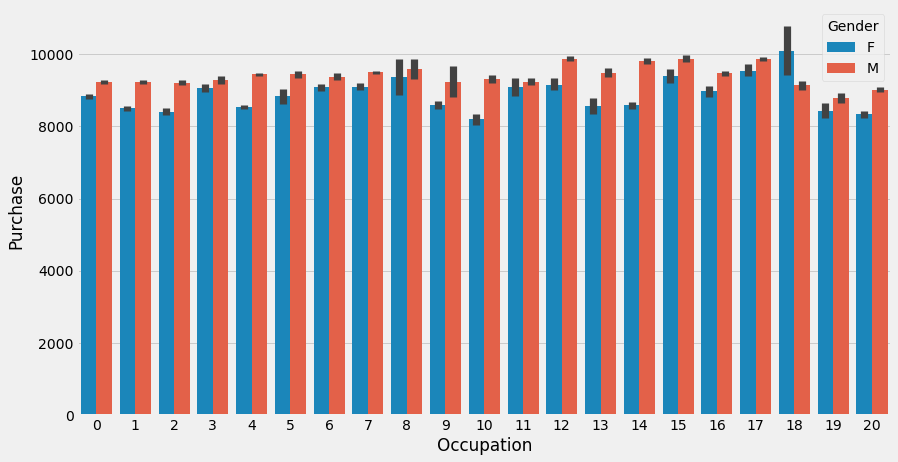

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.barplot(x="Occupation", y = "Purchase", hue = 'Gender',data = train)

#### Age and Genderwise Purchase analysis

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

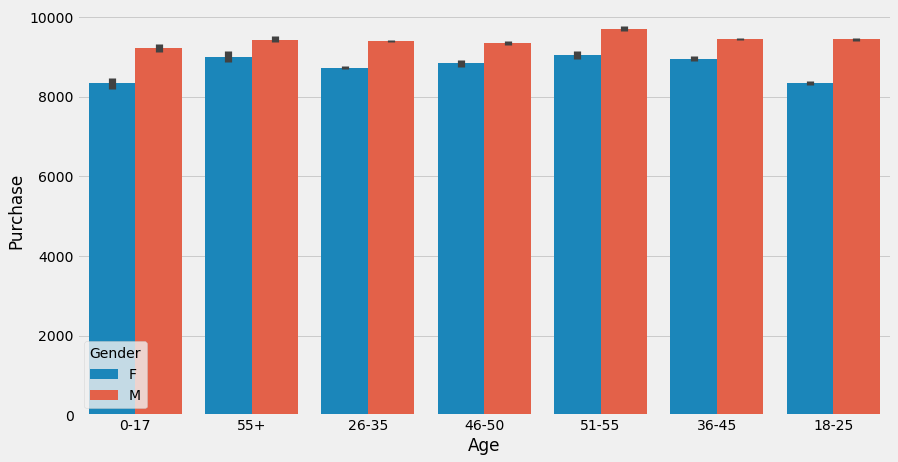

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.barplot(x="Age", y = "Purchase", hue = 'Gender',data = train)

#### Stay in City (Category basis) with Gender and Marital status wise Purchase analysis

<Figure size 936x504 with 0 Axes>

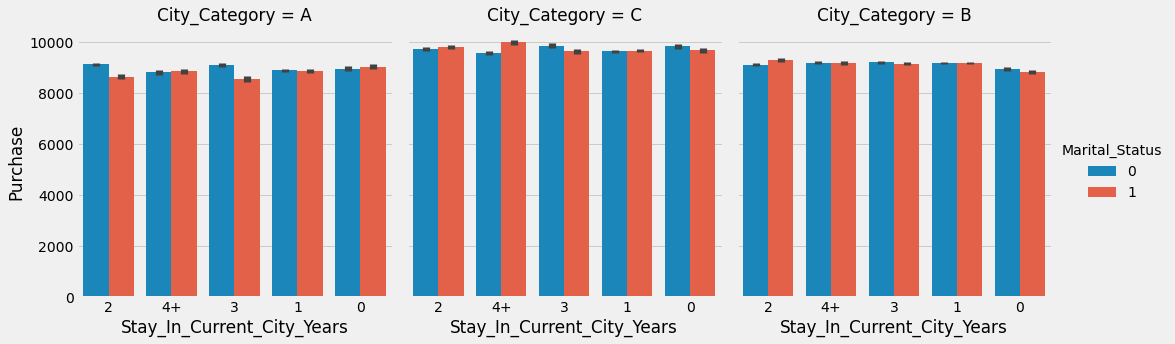

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.catplot(x="Stay_In_Current_City_Years", y = "Purchase",
                hue="Marital_Status", col="City_Category",
                data=train, kind="bar");

#### Product Category wise Purchase

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

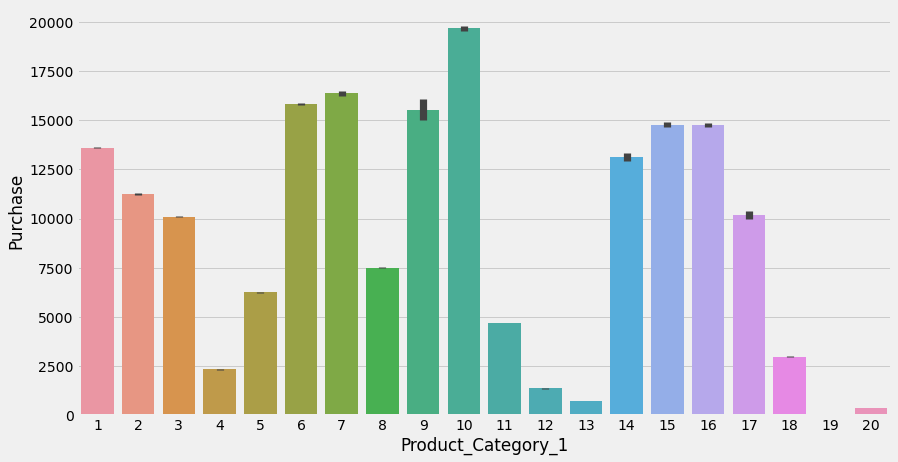

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.barplot(x="Product_Category_1", y = "Purchase", data = train)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

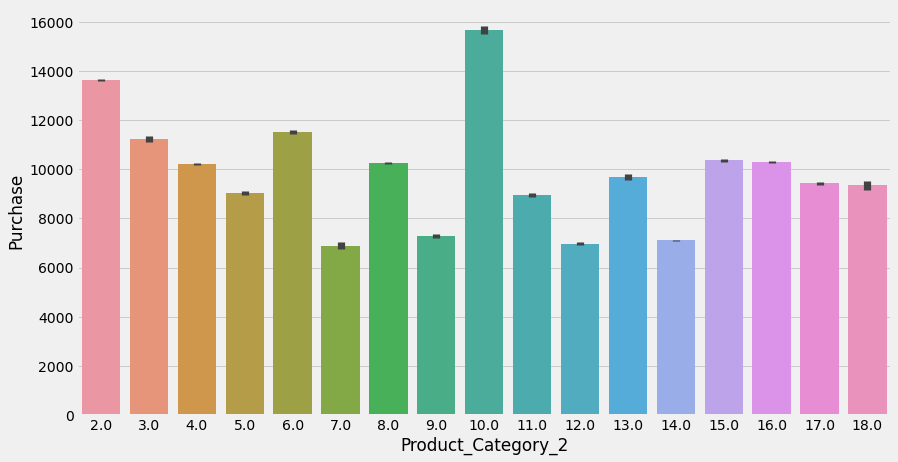

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.barplot(x="Product_Category_2", y = "Purchase", data = train)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

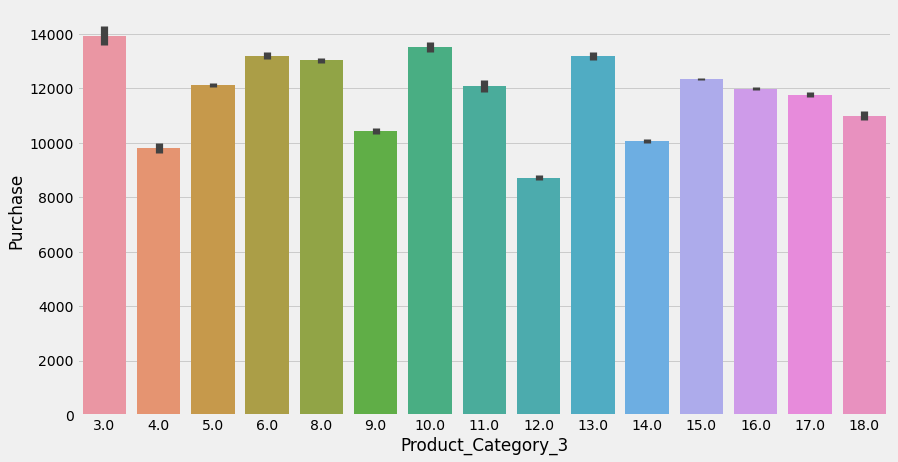

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.barplot(x="Product_Category_3", y = "Purchase", data = train)

In [25]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
ageData = sorted(list(zip(train.Age.value_counts().index, train.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age, 
               y=productBuy, 
               name="How many products were sold",
               marker = dict(color=['black', 'yellow', 'green', 'blue', 'red', 'gray', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

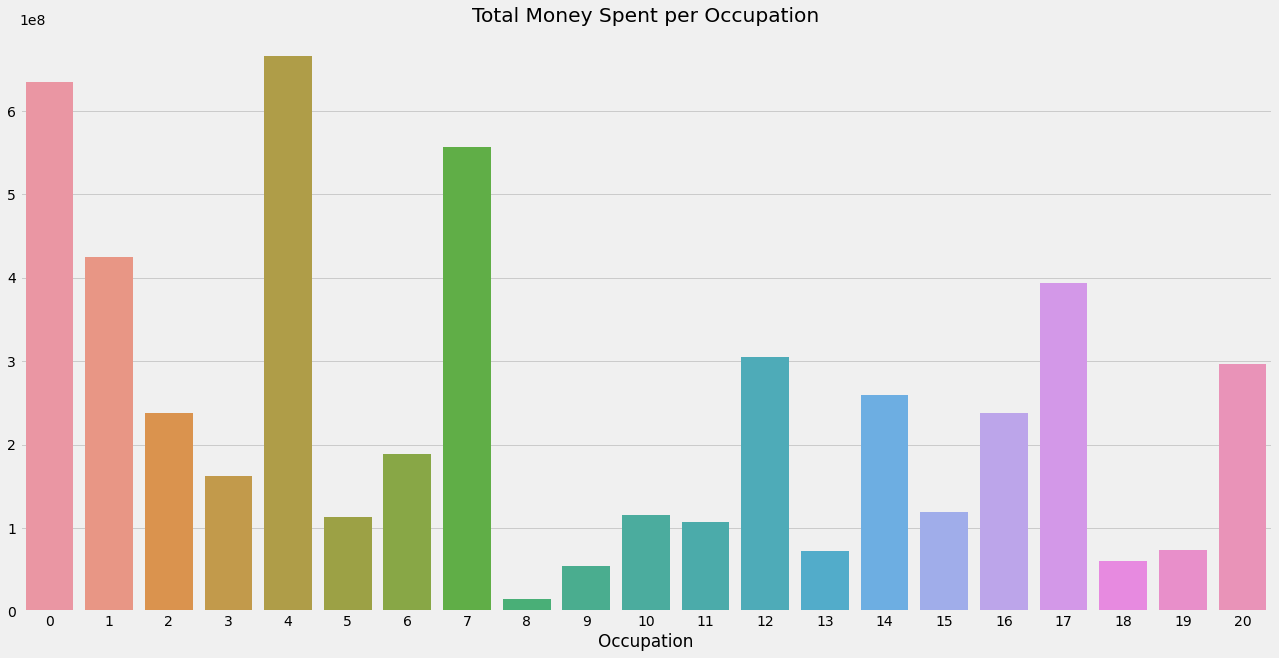

In [26]:
plt.figure(figsize=(20, 10))
spent_by_occ = train.groupby(by='Occupation').sum()['Purchase']
sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

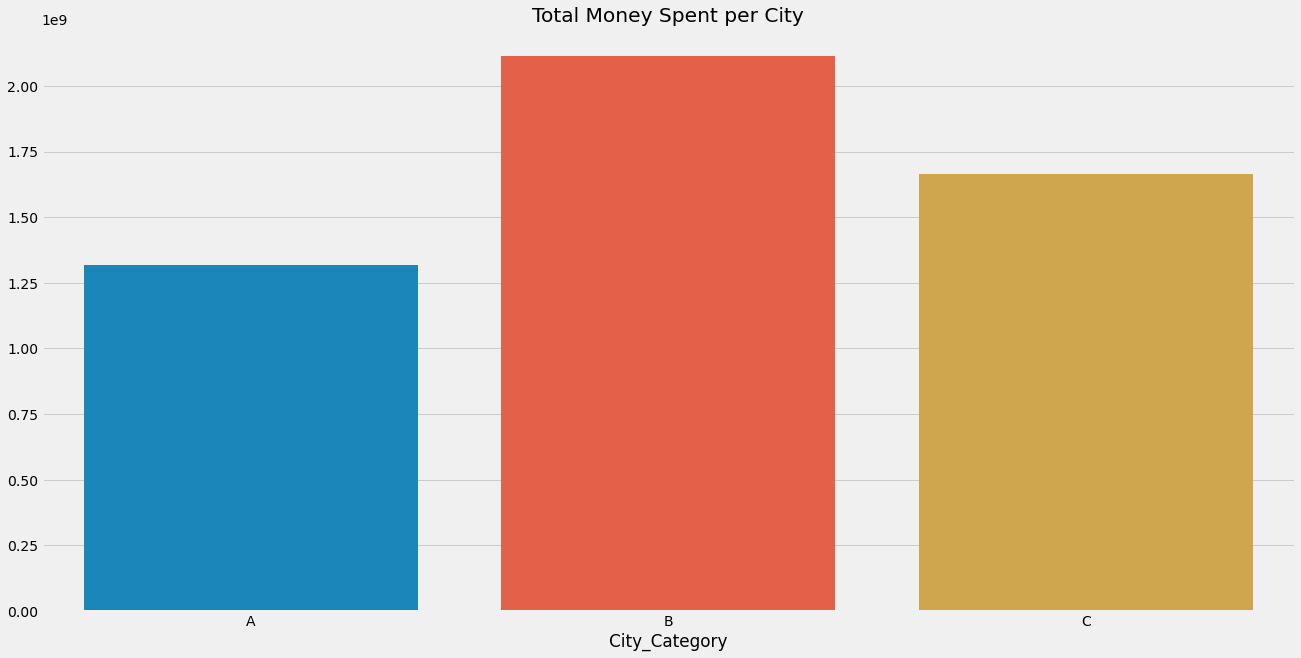

In [27]:
plt.figure(figsize=(20, 10))
spent_by_occ = train.groupby(by='City_Category').sum()['Purchase']
sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per City')
plt.show()

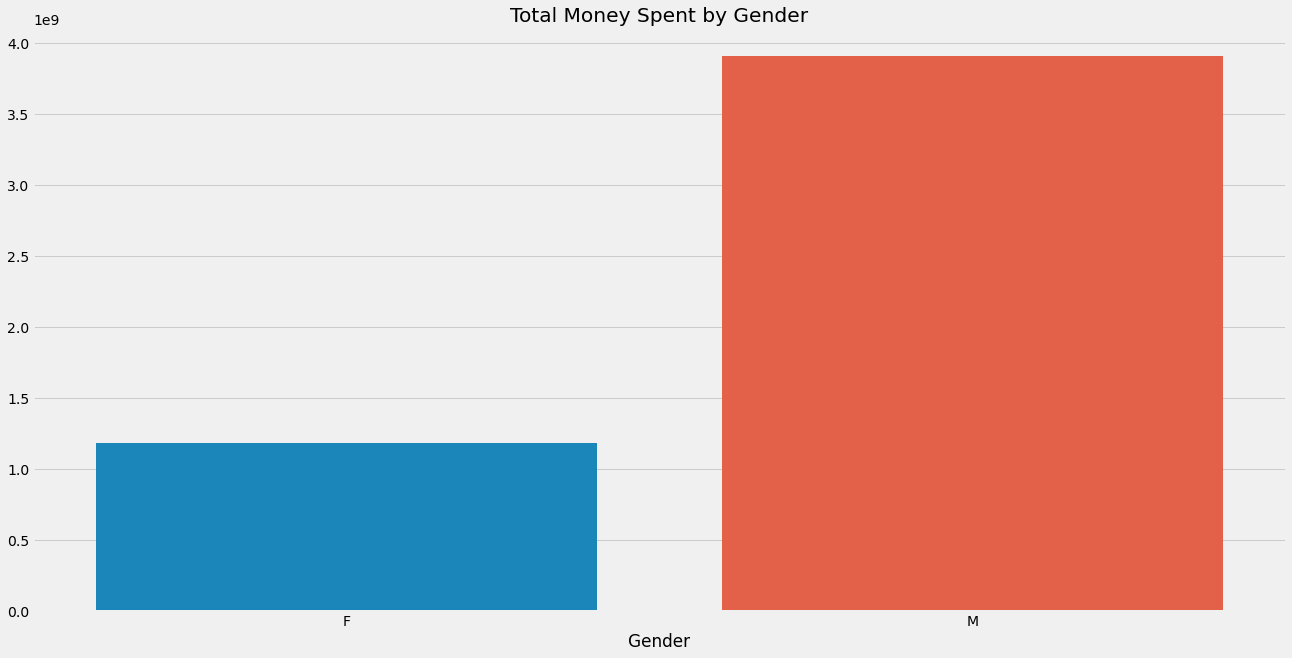

In [28]:
plt.figure(figsize=(20, 10))
spent_by_occ = train.groupby(by='Gender').sum()['Purchase']
sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent by Gender')
plt.show()

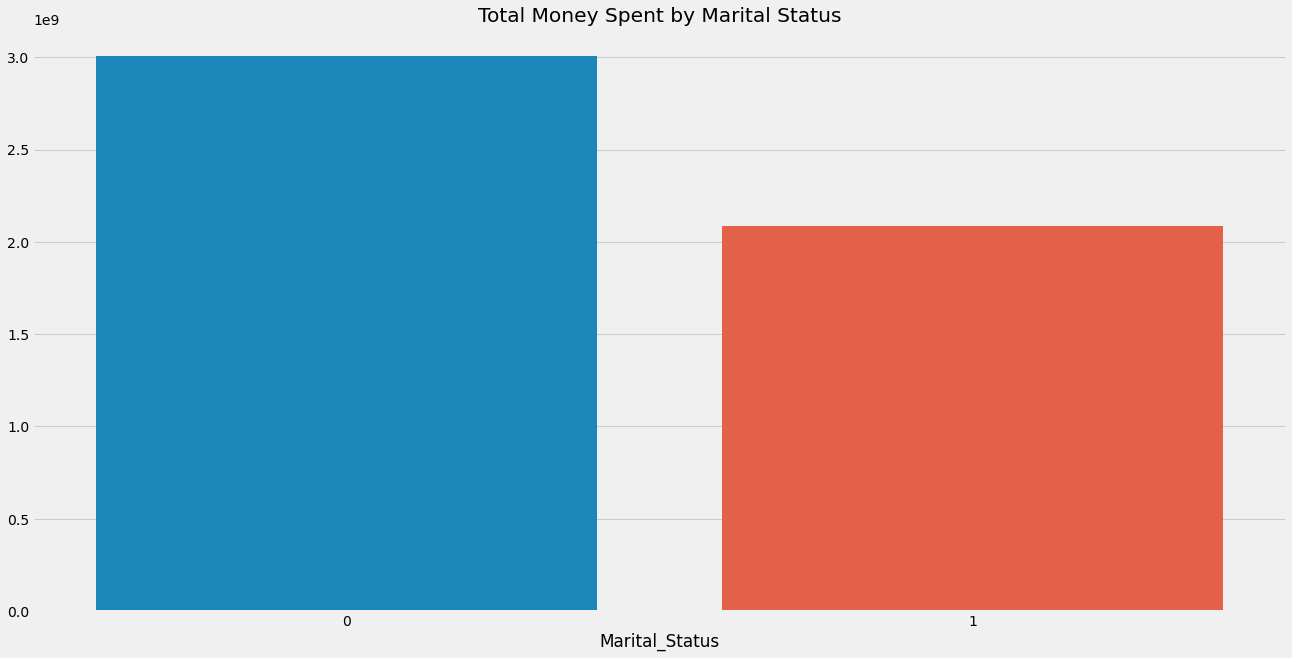

In [29]:
plt.figure(figsize=(20, 10))
spent_by_occ = train.groupby(by='Marital_Status').sum()['Purchase']
sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent by Marital Status')
plt.show()

## Data Preprocessing

#### Categorical to numerical

In [59]:
df_Gender = pd.get_dummies(train['Gender'], prefix='Gender')
df_Age = pd.get_dummies(train['Age'],prefix='Age')
df_City_Category = pd.get_dummies(train['City_Category'],prefix='City')
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'],prefix='Stay')

data_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  ...  Age_51-55  Age_55+  City_A  City_B  City_C  \
0                 NaN  ...          0        0       1       0       0   
1                 6.0  ...          0        0       1       0       0   
2                 NaN  ...          0        0       1       0       0   
3                14.0  ...          0        0       1       0       0   
4                 NaN  ...          0        1       0       0       1   

   Stay_0  Stay_1  Stay_2  Stay_3  Stay_4+  
0       0       0       1       0        0  
1       0       0       1       0        0  
2       0       0       1       0        0  
3       0       0       1       0        0  
4       0       0       0       0        1  

[5 rows x 29 columns]

In [60]:
data_final.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
Gender_F                        uint8
Gender_M                        uint8
Age_0-17                        uint8
Age_18-25                       uint8
Age_26-35                       uint8
Age_36-45                       uint8
Age_46-50                       uint8
Age_51-55                       uint8
Age_55+                         uint8
City_A                          uint8
City_B                          uint8
City_C                          uint8
Stay_0                          uint8
Stay_1                          uint8
Stay_2      

#### Dropping the categrical columns

In [61]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

User_ID Product_ID  Occupation  Marital_Status  Product_Category_1  \
0       1000001  P00069042          10               0                   3   
1       1000001  P00248942          10               0                   1   
2       1000001  P00087842          10               0                  12   
3       1000001  P00085442          10               0                  12   
4       1000002  P00285442          16               0                   8   
...         ...        ...         ...             ...                 ...   
550063  1006033  P00372445          13               1                  20   
550064  1006035  P00375436           1               0                  20   
550065  1006036  P00375436          15               1                  20   
550066  1006038  P00375436           1               0                  20   
550067  1006039  P00371644           0               1                  20   

        Product_Category_2  Product_Category_3  Purchase  Gender_F  Gender_M  \
0                      NaN                 NaN      8370         1         0   
1                      6.0                14.0     15200         1         0   
2                      NaN                 NaN      1422         1         0   
3                     14.0                 NaN      1057         1         0   
4                      NaN                 NaN      7969         0         1   
...                    ...                 ...       ...       ...       ...   
550063                 NaN                 NaN       368         0         1   
550064                 NaN                 NaN       371         1         0   
550065                 NaN                 NaN       137         1         0   
550066                 NaN                 NaN       365         1         0   
550067                 NaN                 NaN       490         1         0   

        ...  Age_51-55  Age_55+  City_A  City_B  City_C  Stay_0  Stay_1  \
0       ...          0        0       1       0       0       0       0   
1       ...          0        0       1       0       0       0       0   
2       ...          0        0       1       0       0       0       0   
3       ...          0        0       1       0       0       0       0   
4       ...          0        1       0       0       1       0       0   
...     ...        ...      ...     ...     ...     ...     ...     ...   
550063  ...          1        0       0       1       0       0       1   
550064  ...          0        0       0       0       1       0       0   
550065  ...          0        0       0       1       0       0       0   
550066  ...          0        1       0       0       1       0       0   
550067  ...          0        0       0       1       0       0       0   

        Stay_2  Stay_3  Stay_4+  
0            1       0        0  
1            1       0        0  
2            1       0        0  
3            1       0        0  
4            0       0        1  
...        ...     ...      ...  
550063       0       0        0  
550064       0       1        0  
550065       0       0        1  
550066       1       0        0  
550067       0       0        1  

[550068 rows x 25 columns]

#### Fill the missing values with Median

In [62]:
data_final['Product_Category_2'].fillna(data_final['Product_Category_2'].mean(), inplace=True)

In [63]:
data_final['Product_Category_3'].fillna(data_final['Product_Category_3'].mean(), inplace=True)

In [64]:
data_final

User_ID Product_ID  Occupation  Marital_Status  Product_Category_1  \
0       1000001  P00069042          10               0                   3   
1       1000001  P00248942          10               0                   1   
2       1000001  P00087842          10               0                  12   
3       1000001  P00085442          10               0                  12   
4       1000002  P00285442          16               0                   8   
...         ...        ...         ...             ...                 ...   
550063  1006033  P00372445          13               1                  20   
550064  1006035  P00375436           1               0                  20   
550065  1006036  P00375436          15               1                  20   
550066  1006038  P00375436           1               0                  20   
550067  1006039  P00371644           0               1                  20   

        Product_Category_2  Product_Category_3  Purchase  Gender_F  Gender_M  \
0                 9.842329           12.668243      8370         1         0   
1                 6.000000           14.000000     15200         1         0   
2                 9.842329           12.668243      1422         1         0   
3                14.000000           12.668243      1057         1         0   
4                 9.842329           12.668243      7969         0         1   
...                    ...                 ...       ...       ...       ...   
550063            9.842329           12.668243       368         0         1   
550064            9.842329           12.668243       371         1         0   
550065            9.842329           12.668243       137         1         0   
550066            9.842329           12.668243       365         1         0   
550067            9.842329           12.668243       490         1         0   

        ...  Age_51-55  Age_55+  City_A  City_B  City_C  Stay_0  Stay_1  \
0       ...          0        0       1       0       0       0       0   
1       ...          0        0       1       0       0       0       0   
2       ...          0        0       1       0       0       0       0   
3       ...          0        0       1       0       0       0       0   
4       ...          0        1       0       0       1       0       0   
...     ...        ...      ...     ...     ...     ...     ...     ...   
550063  ...          1        0       0       1       0       0       1   
550064  ...          0        0       0       0       1       0       0   
550065  ...          0        0       0       1       0       0       0   
550066  ...          0        1       0       0       1       0       0   
550067  ...          0        0       0       1       0       0       0   

        Stay_2  Stay_3  Stay_4+  
0            1       0        0  
1            1       0        0  
2            1       0        0  
3            1       0        0  
4            0       0        1  
...        ...     ...      ...  
550063       0       0        0  
550064       0       1        0  
550065       0       0        1  
550066       1       0        0  
550067       0       0        1  

[550068 rows x 25 columns]

In [65]:
missing_values=data_final.isnull().sum()
percent_missing = data_final.isnull().sum()/data_final.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

missing_values  percent_missing
User_ID                          0              0.0
Product_ID                       0              0.0
Occupation                       0              0.0
Marital_Status                   0              0.0
Product_Category_1               0              0.0
Product_Category_2               0              0.0
Product_Category_3               0              0.0
Purchase                         0              0.0
Gender_F                         0              0.0
Gender_M                         0              0.0
Age_0-17                         0              0.0
Age_18-25                        0              0.0
Age_26-35                        0              0.0
Age_36-45                        0              0.0
Age_46-50                        0              0.0
Age_51-55                        0              0.0
Age_55+                          0              0.0
City_A                           0              0.0
City_B                           0              0.0
City_C                           0              0.0
Stay_0                           0              0.0
Stay_1                           0              0.0
Stay_2                           0              0.0
Stay_3                           0              0.0
Stay_4+                          0              0.0

In [66]:
data_final.dtypes

User_ID                 int64
Product_ID             object
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
Gender_F                uint8
Gender_M                uint8
Age_0-17                uint8
Age_18-25               uint8
Age_26-35               uint8
Age_36-45               uint8
Age_46-50               uint8
Age_51-55               uint8
Age_55+                 uint8
City_A                  uint8
City_B                  uint8
City_C                  uint8
Stay_0                  uint8
Stay_1                  uint8
Stay_2                  uint8
Stay_3                  uint8
Stay_4+                 uint8
dtype: object

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [69]:
x=data_final.drop('User_ID', axis=1)
y=data_final.Purchase

In [70]:
x=data_final.drop(['Product_ID','User_ID'], axis=1)

In [71]:
print(x.shape)
print(y.shape)

(550068, 23)
(550068,)


In [42]:
x

Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0               10               0                   3                 9.0   
1               10               0                   1                 6.0   
2               10               0                  12                 9.0   
3               10               0                  12                14.0   
4               16               0                   8                 9.0   
...            ...             ...                 ...                 ...   
550063          13               1                  20                 9.0   
550064           1               0                  20                 9.0   
550065          15               1                  20                 9.0   
550066           1               0                  20                 9.0   
550067           0               1                  20                 9.0   

        Product_Category_3  Purchase  Gender_F  Gender_M  Age_0-17  Age_18-25  \
0                     14.0      8370         1         0         1          0   
1                     14.0     15200         1         0         1          0   
2                     14.0      1422         1         0         1          0   
3                     14.0      1057         1         0         1          0   
4                     14.0      7969         0         1         0          0   
...                    ...       ...       ...       ...       ...        ...   
550063                14.0       368         0         1         0          0   
550064                14.0       371         1         0         0          0   
550065                14.0       137         1         0         0          0   
550066                14.0       365         1         0         0          0   
550067                14.0       490         1         0         0          0   

        ...  Age_51-55  Age_55+  City_A  City_B  City_C  Stay_0  Stay_1  \
0       ...          0        0       1       0       0       0       0   
1       ...          0        0       1       0       0       0       0   
2       ...          0        0       1       0       0       0       0   
3       ...          0        0       1       0       0       0       0   
4       ...          0        1       0       0       1       0       0   
...     ...        ...      ...     ...     ...     ...     ...     ...   
550063  ...          1        0       0       1       0       0       1   
550064  ...          0        0       0       0       1       0       0   
550065  ...          0        0       0       1       0       0       0   
550066  ...          0        1       0       0       1       0       0   
550067  ...          0        0       0       1       0       0       0   

        Stay_2  Stay_3  Stay_4+  
0            1       0        0  
1            1       0        0  
2            1       0        0  
3            1       0        0  
4            0       0        1  
...        ...     ...      ...  
550063       0       0        0  
550064       0       1        0  
550065       0       0        1  
550066       1       0        0  
550067       0       0        1  

[550068 rows x 23 columns]

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [74]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [75]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

In [76]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9263.617659392414
                     Coefficient
Occupation         -7.707878e-13
Marital_Status      1.648459e-12
Product_Category_1 -1.163514e-12
Product_Category_2  5.144329e-12
Product_Category_3 -1.083578e-12
Purchase            5.023637e+03
Gender_F           -8.591166e+01
Gender_M           -8.591166e+01
Age_0-17           -9.960001e+00
Age_18-25          -2.343930e+01
Age_26-35          -2.980693e+01
Age_36-45          -2.434115e+01
Age_46-50          -1.683655e+01
Age_51-55          -1.551487e+01
Age_55+            -1.178592e+01
City_A             -7.438252e+02
City_B             -8.281766e+02
City_C             -7.768029e+02
Stay_0              1.104219e+03
Stay_1              1.543378e+03
Stay_2              1.253992e+03
Stay_3              1.222400e+03
Stay_4+             1.166887e+03


In [77]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [ 7772.  5432. 13706. ...  8862.  5839. 19060.]


In [78]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
rms = mean_squared_error(y_test, predictions, squared=False)

MAE: 6.692226789098669e-12
MSE: 7.108165827341419e-23


In [79]:
rms

8.430993907803172e-12